# Training eines Multilayerperceptrons (MLP) zur Klassifizierung von Bildern



## Bibliotheken

In [1]:
# Bibliotheken

import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


## Bilder einlesen und konvertieren

In [2]:
# Funktion, um Bilder einzulesen und
# die Pixel der Bilder als Liste auszulesen

def load_images(folder):
    images = []
    files = sorted(os.listdir(folder))
    for filename in files:
        fullname = os.path.join(folder, filename)
        img = Image.open(fullname)
        img = list(img.getdata())
        images.append(img)

    return images

#%%  Bilder X und Label y einlesen

# - In folders werden die Unterordner angegeben, in denen die Bilder liegen
# - Durch die for-Schleife werden nacheinander die Bilder eingelesen
# - Die Bilder werden anschließend in Numpy-Arrays konvertiert

X = []
y = []

workingdir = os.getcwd() + '/fer2013/train/'
folders = ['happy', 'neutral']

for folder in folders:
    images = load_images(workingdir + folder + '/')

    X.extend(images)
    y.extend([folder] * len(images))

# In Arrays umwandeln
X = np.asarray(X)
y = np.asarray(y)


## Trainings- und Validierungssets

Iteration 1, loss = 13.38056776
Iteration 2, loss = 11.09323395
Iteration 3, loss = 10.23753088
Iteration 4, loss = 5.80615243
Iteration 5, loss = 9.74509690
Iteration 6, loss = 8.85731158
Iteration 7, loss = 7.45881276
Iteration 8, loss = 3.18124520
Iteration 9, loss = 3.01044492
Iteration 10, loss = 7.72793466
Iteration 11, loss = 2.99128249
Iteration 12, loss = 3.39983909
Iteration 13, loss = 2.64078425
Iteration 14, loss = 7.86077554
Iteration 15, loss = 2.55988649
Iteration 16, loss = 1.49457981
Iteration 17, loss = 2.35185764
Iteration 18, loss = 3.53741130
Iteration 19, loss = 1.79245559
Iteration 20, loss = 1.87463533
Iteration 21, loss = 3.09458886
Iteration 22, loss = 0.94065713
Iteration 23, loss = 1.02902978
Iteration 24, loss = 1.22247601
Iteration 25, loss = 1.14092500
Iteration 26, loss = 1.06372925
Iteration 27, loss = 1.51202292
Iteration 28, loss = 0.79903699
Iteration 29, loss = 0.76670518
Iteration 30, loss = 0.69434148
Iteration 31, loss = 0.63980058
Iteration 32, 

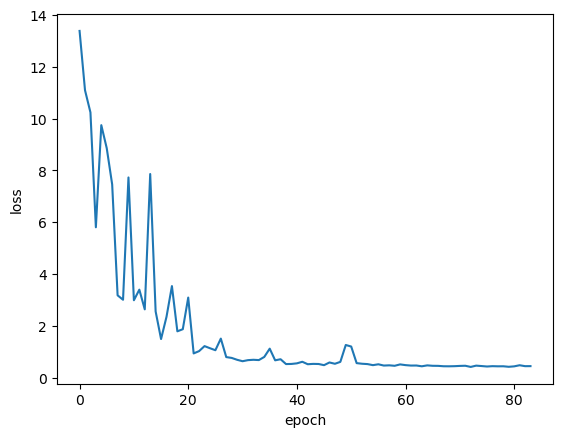

In [3]:
# Trainings- und Validierungssets

# - test_size legt den Anteil der Validierungsdaten fest
# - stratify, um Verteilung der Kategorien beizubehalten
# - random_state, damit die Funktion auch bei mehrmaligem Ausführen die gleiche Aufteilung vornimmt

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=180)

#%% Modell trainieren

# - Parameter im MLPClassifier() festlegen
# - weitere mögliche Parameter sind beispielsweise
#       - der Solver (z.B. solver="adam")
#       - die Aktivierungsfunktion (z.b. activation="relu")
#       - die Lernrate, (z.B. learning_rate='adaptive')
# - Trainieren des Modells durch fit()

mlp = MLPClassifier(
    hidden_layer_sizes=(1000, 100),
    batch_size=200,
    max_iter=1000,
    n_iter_no_change=10,
    verbose=True,
    random_state=180
)

mlp.fit(X_train, y_train)


#%% Loss curve auf allen Daten: y=Loss, x=Epoch. Sollte gegen 0 gehen.

# - Grafik erstellen durch plot()
# - Achsenbeschriftung hinzufügen durch .xlabel sowie .ylabel

plt.plot(mlp.loss_curve_)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("8_1_losscurve.png", dpi=300)
plt.show()


## Validierung des trainierten Modells

      0     1
0  5324   448
1  1507  2465
              precision    recall  f1-score   support

       happy       0.78      0.92      0.84      5772
     neutral       0.85      0.62      0.72      3972

    accuracy                           0.80      9744
   macro avg       0.81      0.77      0.78      9744
weighted avg       0.81      0.80      0.79      9744

      0    1
0  1219  224
1   464  529
              precision    recall  f1-score   support

       happy       0.72      0.84      0.78      1443
     neutral       0.70      0.53      0.61       993

    accuracy                           0.72      2436
   macro avg       0.71      0.69      0.69      2436
weighted avg       0.72      0.72      0.71      2436



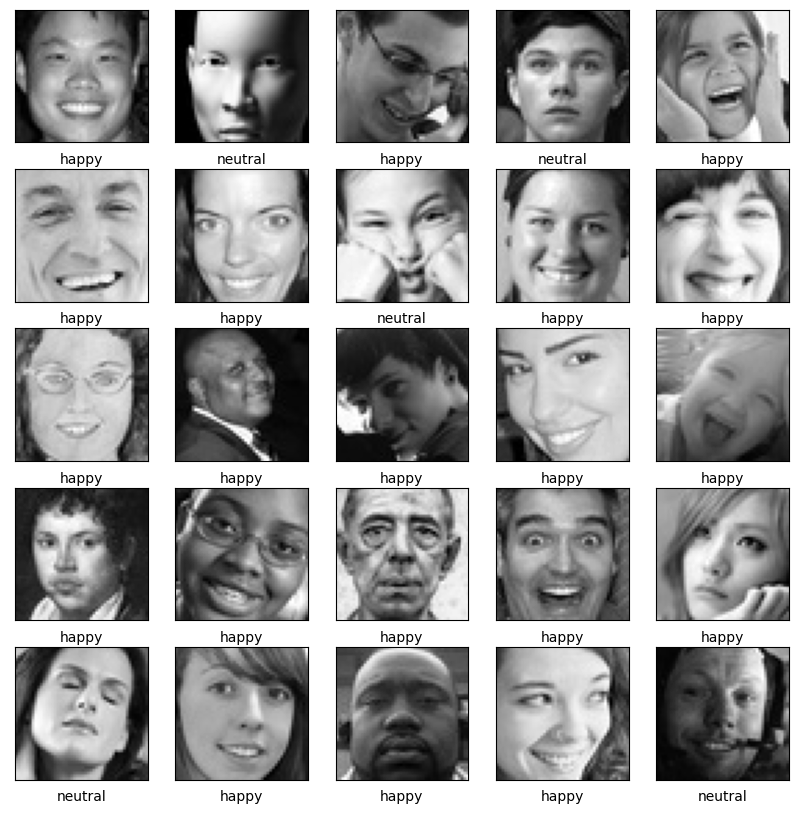

In [5]:
# Validierung des trainierten Modells

# - Vorhersagen von Labels durch predict()
# - Confusion Matrix berechnen durch confusion_matrix()
# - Werte wie Recall oder F1 durch classification_report() ausgeben
#- Falls Sie Beispielbilder visualisieren wollen, siehe unten die Funktion vizualize_pred()

# y vorhersagen
y_pred = mlp.predict(X_train)

# Print confusion matrix
conf = confusion_matrix(y_train, y_pred)
print(pd.DataFrame(conf))

# Precision, recall und F1-Wert
report = classification_report(y_train, y_pred)
print(report)

#%% Validierung des Modells nach abgeschlossenem Training

# Siehe vorherigen Codeblock: X_train durch X_val ausgetauscht,
# um zu sehen, ob das Modell auch für neue Daten geeignet ist

# y vorhersagen
y_pred = mlp.predict(X_val)

# Print confusion matrix
conf = confusion_matrix(y_val, y_pred)
print(pd.DataFrame(conf))

# Precision, recall und F1-Wert
report = classification_report(y_val, y_pred)
print(report)

#%% Visualisierung von Einzelfällen

# Die folgende Funktion wählt zufällig Bilder aus dem Trainingsdatensatz (Parameter X) aus,
# stellt sie dar und beschriftet die Bilder mit der vorhergesagten Kategorie (Parameter y)
def visualize_pred(X, y, ncol=5, nrow=5):
    selected = random.sample(range(len(X)), ncol * nrow)

    plt.figure(figsize=(10, 10))

    for i, num in enumerate(selected):
        some_pixels = X[num]
        some_image = some_pixels.reshape(48, 48)

        some_label = y[num]

        plt.subplot(ncol, nrow , i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        plt.imshow(some_image, cmap="gray")
        plt.xlabel(some_label)

    plt.show()

# Beispielaufruf der Funktion
visualize_pred(X_val, y_pred)


## Weitere Bilder klassifizieren

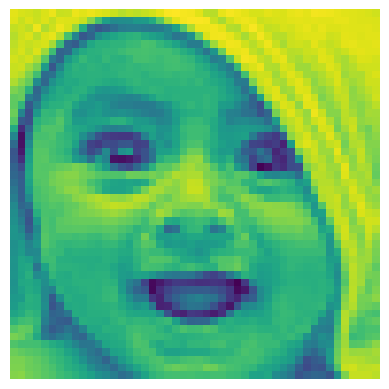

['happy']


In [33]:
# Weitere Bilder klassifizieren

# - Ordner "eigenes_foto" erstellen und dort ein eigenes Bild ablegen
# - rows und cols gegebenfalls anpassen: Nur so viele Kacheln angeben, wie eigene Bilder vorhanden

# Pfad zum Bild
bild_pfad = os.getcwd() + "/eigenes_foto/dein_bild.jpg"  # Passe den Dateinamen und Pfad an

# Bild mit PIL laden
bild_pil = Image.open(bild_pfad)

# Bild mit Matplotlib anzeigen
plt.imshow(bild_pil)
plt.axis('off')  # Optional: Entfernt die Achsenbeschriftung
plt.show()

workingdir = os.getcwd()
X_new = load_images(workingdir + '/eigenes_foto/')
X_new = np.asarray(X_new)

y_new = mlp.predict(X_new)
print(y_new)

## Modell abspeichern und neu laden

In [19]:
#  Modell abspeichern und neu laden

# zusätzlich benötigte Bibliothek einlesen
from joblib import dump, load

# Modell abspeichern
dump(mlp,'mlp.joblib')

# Modell laden
mlp = load('mlp.joblib')
